In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.style.use("ggplot")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("E:\\Users\\joshu\\Documents\\DataAnalystProjects\\Project3-Python\\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# 1) Looking for missing data and dealing with it:

In [3]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
(df.isna().sum() /df.shape[0]) * 100

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
## dealing with the budget missing values using random allocation

mean = df['budget'].mean()
stddev = df['budget'].std()

diff = mean - stddev
addition = mean + stddev

print("mean: ",mean," std dev: ",stddev)
print("Addition: ",addition)
print("Diff: ",diff)
#uniform picks up a float value between two given values
r = np.random.uniform(diff, addition)
r = np.round(r,0)
print("random uniform number: ",r)





mean:  35589876.192650534  std dev:  41457296.601931
Addition:  77047172.79458153
Diff:  -5867420.409280464
random uniform number:  -4488221.0


In [8]:
for i,data in df.iterrows():           #iterates on rows and gives back index and row data # data refers to full row
    if pd.isnull(data['budget']):   
        r = abs(np.random.uniform(diff, addition))
        r = np.round(r,0)
        df.at[i,"budget"] = r
        #print(i," ", df.at[i, 'budget'])
        

# we will aslo try KNN imputation later

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [10]:
(df.isna().sum() /df.shape[0]) * 100

name        0.000000
rating      1.004173
genre       0.000000
year        0.000000
released    0.026082
score       0.039124
votes       0.039124
director    0.000000
writer      0.039124
star        0.013041
country     0.039124
budget      0.000000
gross       2.464789
company     0.221701
runtime     0.052165
dtype: float64

In [11]:
df.dropna(inplace=True)
df = df.reset_index()

# 2) dealing with the datatypes of the columns:

In [12]:
df.dtypes

index         int64
name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
df['name'] = df['name'].astype(str)
df['rating'] = df['rating'].astype(str)
df['genre'] = df['genre'].astype(str)
df['released'] = df['released'].astype(str)
df['director'] = df['director'].astype(str)
df['writer'] = df['writer'].astype(str)
df['star'] = df['star'].astype(str)
df['country'] = df['country'].astype(str)
df['company'] = df['company'].astype(str)

# 3) cleaning year and released columns:

In [14]:
df.head(3)

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [15]:
df['released'].str.split("(")[0][0].strip()[-4:]

'1980'

In [16]:
for i in range(df.shape[0]):
    df['correct year'] = df['released'].str.split("(")[i][0].strip()[-4:]
    #print(i, df.at[i,'correct year'])

In [18]:
df['correct year'] = df['correct year'].astype(int)
df.head(3)

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
0,0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,2020
1,1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,2020
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,2020


In [19]:
df = df.sort_values(by = ['gross'], ascending=False)

# 4) Dropping duplicates:

In [20]:
df[df.duplicated()] # we have no duplicates

## df.drop_duplicates()

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year


In [21]:
t = df.drop_duplicates()
t.head()

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5233,5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2020
7221,7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2020
2867,3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,2020
6446,6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2020
7021,7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2020


# 5) finding columns correlated to gross revenue:

In [22]:
# test hypothesis:
# higher the budget, more gross revenue, bigger companies bring in more revenue

### a) budget and gross:

Text(0.5, 1.0, 'Budget vs Revenue')

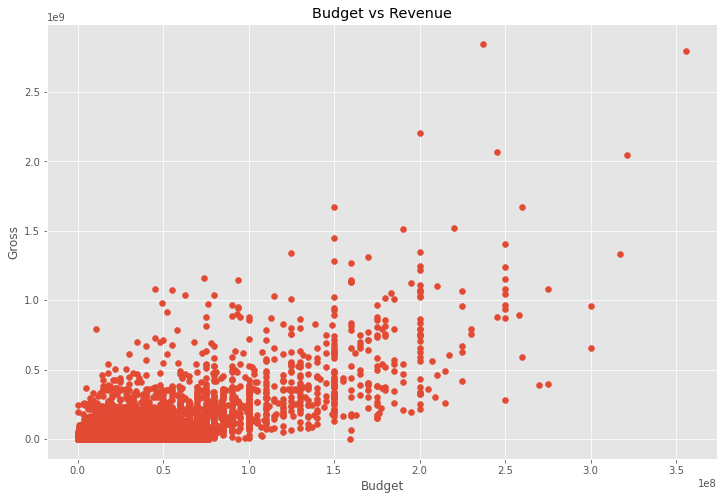

In [23]:
plt.scatter(df['budget'], df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title("Budget vs Revenue")

In [24]:
# we see a positive correlation between the gross and budget
df[['gross','budget']].corr()

,gross,budget
gross,1.000000,0.674224
budget,0.674224,1.000000


<AxesSubplot:xlabel='budget', ylabel='gross'>

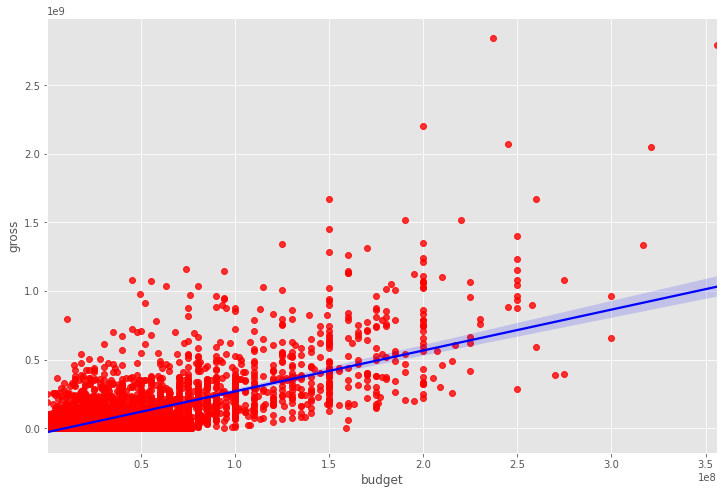

In [25]:
sns.regplot(x='budget',y='gross',data=df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

### b) votes and gross:

<AxesSubplot:xlabel='votes', ylabel='gross'>

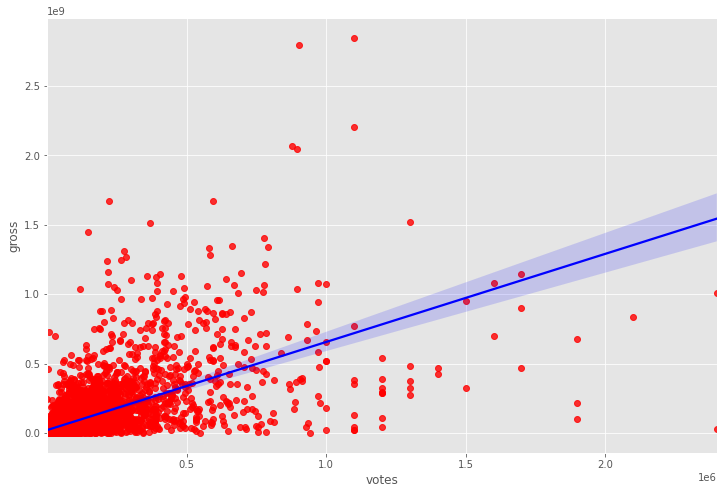

In [26]:
sns.regplot(x='votes',y='gross',data=df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [27]:
df[['votes','gross']].corr()

,votes,gross
votes,1.00000,0.63111
gross,0.63111,1.00000


### c) corr with all columns:

In [28]:
df.corr()

,index,year,score,votes,budget,gross,runtime,correct year
index,1.000000,0.999511,0.085970,0.205619,0.242583,0.248718,0.108681,NaN
year,0.999511,1.000000,0.093951,0.218941,0.248682,0.258826,0.114237,NaN
score,0.085970,0.093951,1.000000,0.415190,0.058545,0.188071,0.397226,NaN
votes,0.205619,0.218941,0.415190,1.000000,0.396278,0.631110,0.309945,NaN
budget,0.242583,0.248682,0.058545,0.396278,1.000000,0.674224,0.249610,NaN
gross,0.248718,0.258826,0.188071,0.631110,0.674224,1.000000,0.245117,NaN
runtime,0.108681,0.114237,0.397226,0.309945,0.249610,0.245117,1.000000,NaN
correct year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


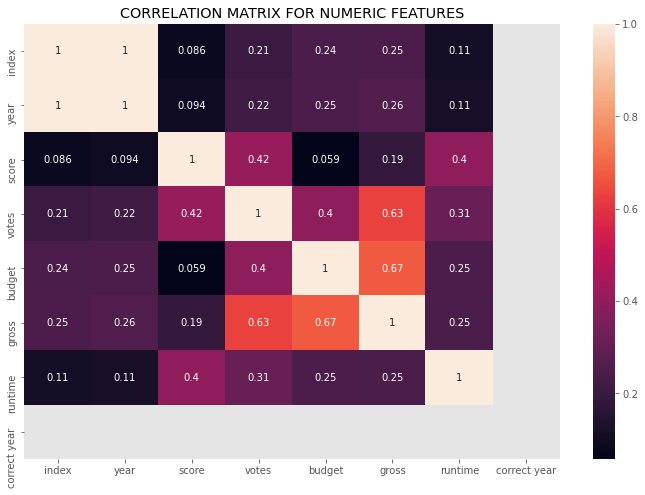

In [29]:
sns.heatmap(df.corr(), annot=True)
plt.title("CORRELATION MATRIX FOR NUMERIC FEATURES")
plt.show()

### d) dealing with company:

In [30]:
len(df['company'].unique())

2242

In [31]:
df_numerized = df.copy()

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5233,5445,515,5,0,2009,678,7.8,1100000.0,1107,1705,2198,53,237000000.0,2.847246e+09,2115,162.0,2020
7221,7445,517,5,0,2019,176,8.4,903000.0,160,708,2107,53,356000000.0,2.797501e+09,1508,181.0,2020
2867,3045,6668,5,6,1997,686,7.8,1100000.0,1107,1705,1502,53,200000000.0,2.201647e+09,2115,194.0,2020
6446,6663,4958,5,0,2015,680,7.8,876000.0,1077,2448,494,53,245000000.0,2.069522e+09,1446,138.0,2020
7021,7244,518,5,0,2018,185,8.4,897000.0,160,708,2107,53,321000000.0,2.048360e+09,1508,149.0,2020


In [32]:
df.head()

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5233,5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2020
7221,7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2020
2867,3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,2020
6446,6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2020
7021,7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2020


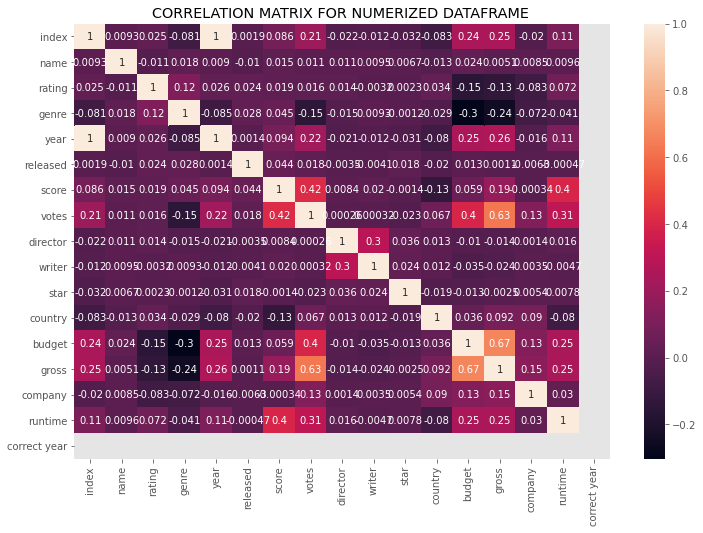

In [33]:
sns.heatmap(df_numerized.corr(), annot=True)
plt.title("CORRELATION MATRIX FOR NUMERIZED DATAFRAME ")
plt.show()

In [34]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

index         index           1.000000
              name            0.009281
              rating          0.024505
              genre          -0.080809
              year            0.999511
              released        0.001943
              score           0.085970
              votes           0.205619
              director       -0.021819
              writer         -0.012461
              star           -0.031597
              country        -0.083185
              budget          0.242583
              gross           0.248718
              company        -0.019662
              runtime         0.108681
              correct year         NaN
name          index           0.009281
              name            1.000000
              rating         -0.010815
              genre           0.018363
              year            0.008987
              released       -0.010012
              score           0.014970
              votes           0.011462
              director   

In [35]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

gross     votes       0.631110
votes     gross       0.631110
budget    gross       0.674224
gross     budget      0.674224
year      index       0.999511
index     year        0.999511
          index       1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
name      name        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [36]:
# Gross has a moderate positive correlation with budget and votes 
# it has a weak positive correlation with company